# Character Statistics
---

### Libraries

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### Settings

In [215]:
pd.options.mode.copy_on_write = True
plt.style.use('dark_background')
# plt.style.use('Solarize_Light2')
# plt.style.use('ggplot')

### .csv formatting

In [216]:
# Open csv
with open("data/marios.csv", "r") as file: 
    reader = csv.reader(file) 
    
    with open("character-statistics.csv", "w") as result: 
        writer = csv.writer(result) 
        
        # Remove rows & columns
        i = 0
        for row in reader:
            if i != 0 and i != 1 and  i !=2:
                writer.writerow(row[1:])
   
            # Rename Alignment columns         
            if i == 1:
                row[5] = "Align_Law"
                row[6] = "Align_Moral"
                writer.writerow(row[1:])
            
            i += 1
        

In [217]:
# Make the dataframe
data = pd.read_csv("character-statistics.csv")
# Drop empty rows
data = data.dropna(subset=["Name"])
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Ursa,Female,Half-Elf,Medium,Chaotic,Neutral,22.0,Criminal,In Relationship,Alive,...,NaN,NaN,NaN,Crusher,Ability Score Improvement,Grappler,Tough,NaN,NaN,NaN
1,Emily,Female,Tabaxi,Medium,Chaotic,Good,20.0,House Agent,In Relationship,Alive,...,NaN,NaN,NaN,Gunner,Piercer,NaN,NaN,NaN,NaN,NaN
2,Anillia Wulf,Female,Human,Medium,Chaotic,Good,20.0,Entertainer,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,NaN,NaN,NaN,NaN,NaN,NaN
3,Belkas Amberwood,Male,Halfling,Small,Lawful,Good,35.0,Custom Background,Single,Alive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sylia Nightblossom,Female,Elf,Medium,Chaotic,Neutral,17.0,Hermit,Single,Alive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data type transformation

In [218]:
# Gold to float 
data["Gold"] = data["Gold"].str.replace("g", "")
data["Gold"] = data["Gold"].str.replace(".", "")
data["Gold"] = data["Gold"].str.replace(",", ".")
data["Gold"] = pd.to_numeric(data["Gold"])

In [219]:
# Fill NaN values
data[["Gold", "l2", "l3", "l4"]] = data[["Gold", "l2", "l3", "l4"]].fillna(0.0)
data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]] = data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]].fillna("No")
data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]] = data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]].fillna("None")
data[["Level", "l1"]] = data[["Level", "l1"]].fillna(1.0)
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Ursa,Female,Half-Elf,Medium,Chaotic,Neutral,22.0,Criminal,In Relationship,Alive,...,0.0,No,0.0,Crusher,Ability Score Improvement,Grappler,Tough,None,None,None
1,Emily,Female,Tabaxi,Medium,Chaotic,Good,20.0,House Agent,In Relationship,Alive,...,0.0,No,0.0,Gunner,Piercer,None,None,None,None,None
2,Anillia Wulf,Female,Human,Medium,Chaotic,Good,20.0,Entertainer,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,None,None,None,None,None,None
3,Belkas Amberwood,Male,Halfling,Small,Lawful,Good,35.0,Custom Background,Single,Alive,...,0.0,No,0.0,None,None,None,None,None,None,None
4,Sylia Nightblossom,Female,Elf,Medium,Chaotic,Neutral,17.0,Hermit,Single,Alive,...,0.0,No,0.0,None,None,None,None,None,None,None


# First Look
---

## Numeric Data

In [220]:
data[["Age", "Gold", "Level"]].describe()

,Age,Gold,Level
count,20.000000,20.000000,20.00000
mean,47.150000,233.850000,6.15000
std,45.640789,812.598967,4.27077
min,17.000000,1.000000,2.00000
25%,20.000000,9.500000,3.00000
50%,35.000000,11.500000,3.50000
75%,40.500000,17.500000,10.25000
max,200.000000,3650.000000,15.00000


## Categorical Data (Personal)

In [221]:
data[["Gender", "Race", "Size", "Align_Law", "Align_Moral", "Background", "Relationships", "Wellbeing", "Status"]].describe()

,Gender,Race,Size,Align_Law,Align_Moral,Background,Relationships,Wellbeing,Status
count,20,20,20,20,20,20,20,20,20
unique,2,11,2,3,2,17,4,1,3
top,Female,Elf,Medium,Chaotic,Neutral,Criminal,Single,Alive,Concept
freq,13,4,13,8,11,3,12,20,10


## Gender

Text(0.5, 1.0, 'Gender')

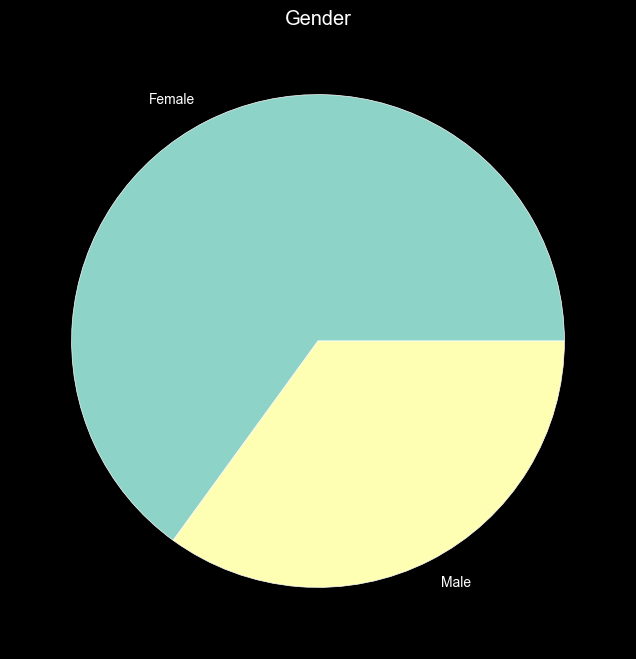

In [222]:
fig, ax = plt.subplots(figsize=(8, 8))

count = data.Gender.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index)
ax.set_title("Gender")

## Race & Size

Text(0.5, 1.0, 'Size')

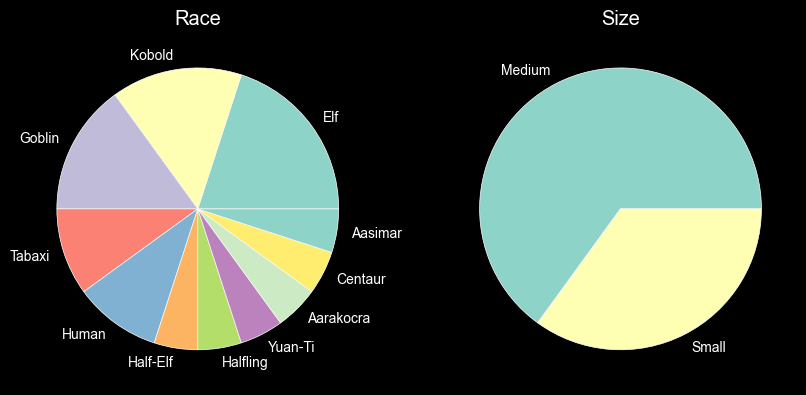

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Race.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index)
ax1.set_title('Race')

count = data.Size.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index)
ax2.set_title('Size')

## Alignment

Text(0.5, 1.0, 'Morality')

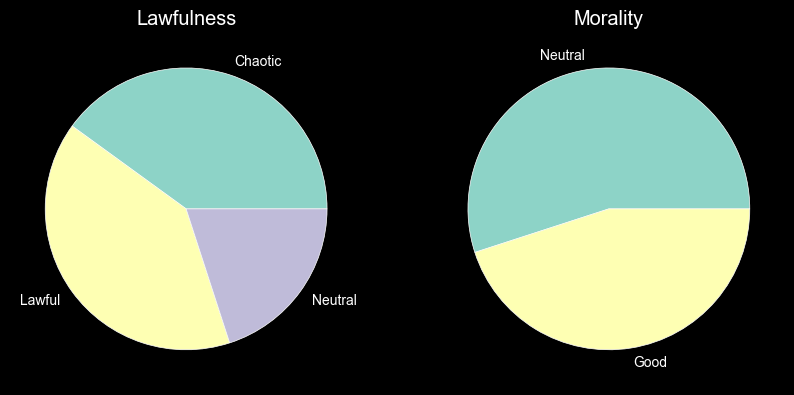

In [224]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Align_Law.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index)
ax1.set_title('Lawfulness')

count = data.Align_Moral.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index)
ax2.set_title('Morality')

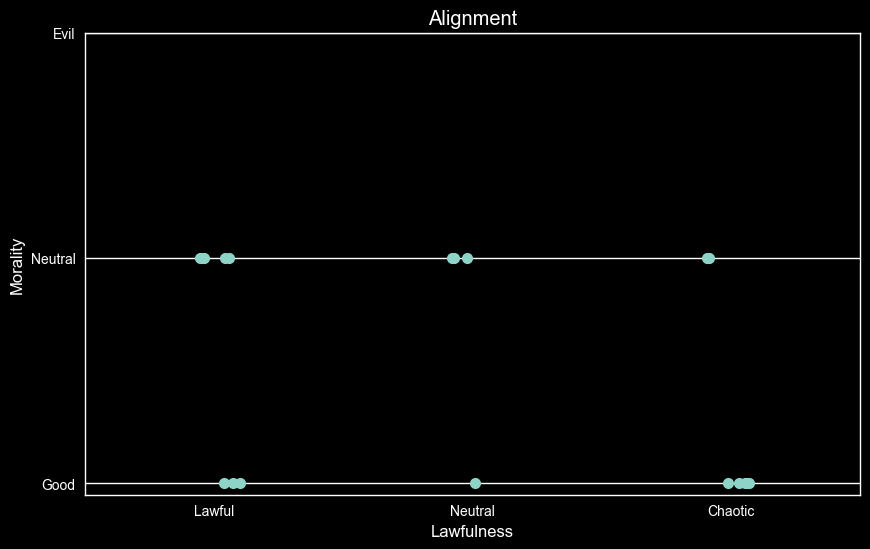

In [225]:
law_map = {"Lawful": 0, "Neutral": 1, "Chaotic": 2}
moral_map = {"Good": 0, "Neutral": 1, "Evil": 2}

alignment_mapped = data[["Align_Law", "Align_Moral"]]
alignment_mapped["Align_Law"] = alignment_mapped["Align_Law"].map(law_map)
alignment_mapped["Align_Moral"] = alignment_mapped["Align_Moral"].map(moral_map)

plt.figure(figsize=(10,6))
sns.stripplot(x="Align_Law", y="Align_Moral", data=alignment_mapped, jitter=True, size=8)

plt.xticks([0,1,2], ["Lawful", "Neutral", "Chaotic"])
plt.yticks([0,1,2], ["Good", "Neutral", "Evil"])

plt.xlabel("Lawfulness")
plt.ylabel("Morality")
plt.title("Alignment")
plt.show()  